<a href="https://colab.research.google.com/github/eunzzae/KaggleStudy_MustHave/blob/main/Chap07_%EB%B2%94%EC%A3%BC%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 경진대회 이해
캐글 데이터 : https://www.kaggle.com/competitions/cat-in-the-dat

## 1-1) 데이터 설명
* <피쳐> 맥락이 없어 의미는 알 수 없음
nom : 명목데이터  
ord_ : 순서형 데이터  
day, mont

* <예측> 0, 1 형태로 예측함


# 2. 탐색적 데이터 분석
## 2-1) 데이터 둘러보기

In [ ]:
import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
import pandas as pd

data_path = '/content/drive/MyDrive/[캐글] 스터디_musthave/data/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')

train #300000 * 24col
test #200000*23col

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


In [ ]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [ ]:
def resumetable(df):
  print(f'데이터 세트 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['임의값'] = df.loc[0].values

  # 고윳값 한번에 출력하기
  unique_feature = []
  for i in range(len(df.columns)):
    feature = train.columns[i]
    unique_feature.append(train[feature].unique())
  summary['고윳값'] = unique_feature

  return summary

resumetable(train)

데이터 세트 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,임의값,고윳값
0,bin_0,int64,0,2,0,"[0, 1]"
1,bin_1,int64,0,2,0,"[0, 1]"
2,bin_2,int64,0,2,0,"[0, 1]"
3,bin_3,object,0,2,T,"[T, F]"
4,bin_4,object,0,2,Y,"[Y, N]"
5,nom_0,object,0,3,Green,"[Green, Blue, Red]"
6,nom_1,object,0,6,Triangle,"[Triangle, Trapezoid, Polygon, Square, Star, C..."
7,nom_2,object,0,6,Snake,"[Snake, Hamster, Lion, Cat, Dog, Axolotl]"
8,nom_3,object,0,6,Finland,"[Finland, Russia, Canada, Costa Rica, China, I..."
9,nom_4,object,0,4,Bassoon,"[Bassoon, Piano, Theremin, Oboe]"


In [ ]:
for i in range(3):
  feature = 'ord_' + str(i)
  print(f'{feature} : {train[feature].unique()}')

ord_0 : [2 1 3]
ord_1 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


## 2-2) 데이터 시각화  

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0.5, 1.0, 'Target Distribution')]

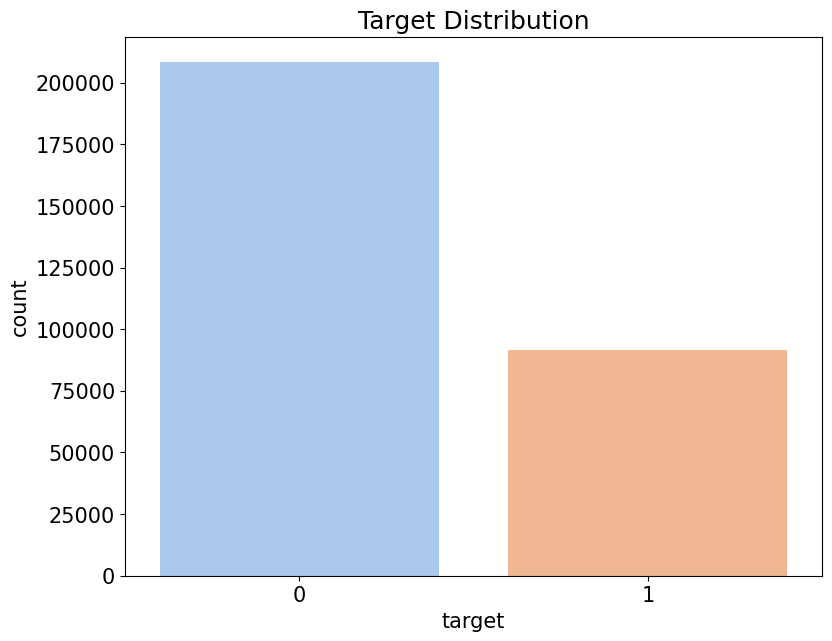

In [ ]:
sns.set_palette('pastel')
mpl.rc('font', size=15) # 폰트크기 설정
fig = plt.figure(figsize=(9,7)) # Figure 크기 설정

fig = sns.countplot(train, x='target')
fig.set(title='Target Distribution')

### ax.patches 사용법

In [ ]:
rectangle = fig.patches[0] # 첫번째 rectangle 객체
print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train)*0.001)

사각형 높이: 208236.0
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4
텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


In [ ]:
fig.patches[0].get_x()

-0.4

Text(0.5, 1.0, 'Target Distriburion')

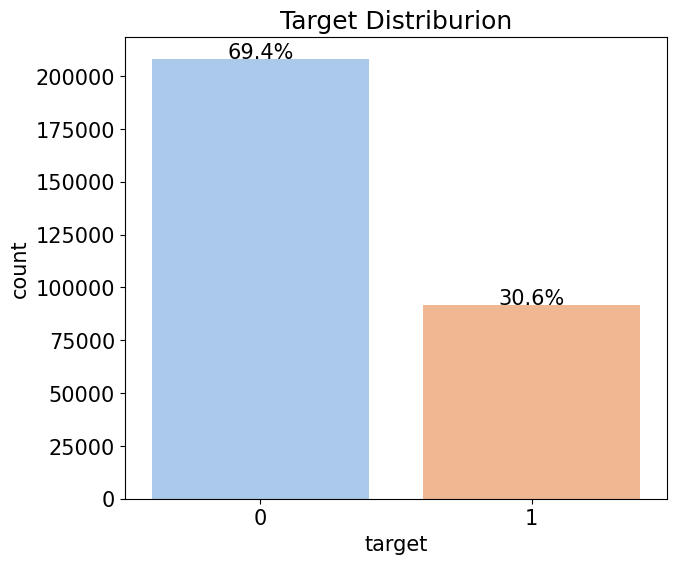

In [ ]:
def write_percent(fig, total_size):
  ''' 도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''

  for patch in fig.patches:
    height=patch.get_height() # 도형 높이(데이터 개수)
    width = patch.get_width() # 도형 너비
    left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
    percent = height/total_size*100 # 타깃값 비율

    # (x, y) 좌표에 텍스트 입력
    fig.text(x=left_coord + width/2.0,     # x축 위치
             y=height + total_size*0.001,  # y축 위치
             s=f'{percent:1.1f}%',         # 입력 텍스트
             ha='center')                  # 가운데 정렬

plt.figure(figsize=(7,6))

fig = sns.countplot(train, x='target')
write_percent(fig, len(train)) # 비율 표시
fig.set_title('Target Distriburion')